# **Hierarchical Clustering**


**Objectives:**
- [A] Importing Hierarchical Clustering from scipy
- [B] Using the `linkage` function for hierarchical clustering
- [C] The columns of **`Z`**
- [D] Settings of the **`linkage`** method
- [E] Visualizing the cluster hierarchy using a dendrogram

---

We import the same packages as before:

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

Loading data:

In [ ]:
url = 'https://raw.githubusercontent.com/brunojacobs/BUMK744/master/data/cars.csv'

cars = pd.read_csv(url)

Let us look at the first few rows of the data:

In [ ]:
cars.head()

,Carname,mpg,disp,hp,drat,wt,qsec
0,Mazda RX4,21.0,160.0,110,3.90,2.620,16.46
1,Mazda RX4 Wag,21.0,160.0,110,3.90,2.875,17.02
2,Datsun 710,22.8,108.0,93,3.85,2.320,18.61
3,Hornet 4 Drive,21.4,258.0,110,3.08,3.215,19.44
4,Hornet Sportabout,18.7,360.0,175,3.15,3.440,17.02


The data is about cars and the variables in the columns are:
- `Carname`: Name of the car
- `mpg`: Miles/gallon
- `disp`: Displacement
- `hp`: Horsepower
- `drat`: Rear axle ratio
- `wt`: Weight
- `qsec`: 1/4 mile time


Note that **`Carname`** is a separate column and that it contains non-numerical data
- It is usually a better idea to use these names as the **index** of the rows in the pandas DataFrame
- We can use the **`set_index`** method of a pandas DataFrame to do this
- This will take a column from the DataFrame and set it as its new index:

In [ ]:
cars = cars.set_index('Carname')
cars.head()

,mpg,disp,hp,drat,wt,qsec
Carname,,,,,,
Mazda RX4,21.0,160.0,110,3.90,2.620,16.46
Mazda RX4 Wag,21.0,160.0,110,3.90,2.875,17.02
Datsun 710,22.8,108.0,93,3.85,2.320,18.61
Hornet 4 Drive,21.4,258.0,110,3.08,3.215,19.44
Hornet Sportabout,18.7,360.0,175,3.15,3.440,17.02


Remember that we can use both the **`loc`** and **`iloc`** attributes to access data from a pandas DataFrame:
- **`loc`** is based on labels, for example the names of the cars and variables
 - Note that **`loc`** does not work with numerical indexes!
- **`iloc`** is based on numerical indexes, for example row numbers and column numbers
 - Note that **`iloc`** does not work with labels!

 What do you prefer?

In [ ]:
cars.loc['Honda Civic']

mpg     30.400
disp    75.700
hp      52.000
drat     4.930
wt       1.615
qsec    18.520
Name: Honda Civic, dtype: float64

In [ ]:
cars.iloc[4]

mpg      18.70
disp    360.00
hp      175.00
drat      3.15
wt        3.44
qsec     17.02
Name: Hornet Sportabout, dtype: float64

Because hierarchical clustering relies on distances, computed using the **Euclidean distance** metric, it is a good idea to:
- Center (demean) your variables
- Standardize your variables

In [ ]:
X = cars.copy()
X = (X - X.mean()) / X.std()
X.head()

,mpg,disp,hp,drat,wt,qsec
Carname,,,,,,
Mazda RX4,0.150885,-0.570620,-0.535093,0.567514,-0.610400,-0.777165
Mazda RX4 Wag,0.150885,-0.570620,-0.535093,0.567514,-0.349785,-0.463781
Datsun 710,0.449543,-0.990182,-0.783040,0.474000,-0.917005,0.426007
Hornet 4 Drive,0.217253,0.220094,-0.535093,-0.966118,-0.002300,0.890487
Hornet Sportabout,-0.230735,1.043081,0.412942,-0.835198,0.227654,-0.463781


Finally, let us look at the dimensions of the data:

In [ ]:
N, P = X.shape
print('N:', N, 'P:', P)

N: 32 P: 6


---
# [A] Importing Hierarchical Clustering from scipy


- We will **not** use scikit-learn to perform hierarchical clustering
- Although scikit-learn contains hierarchical clustering functionality, it does not contain functions to visualize a hierarchical cluster
- Visualization is essential to drawing insight from a hierarchical clustering analysis.

Instead we will use the **`scipy`** library
- We will use the hierarchical clustering functionality from **`scipy`**
- `scipy` is one of the defacto scientific computing packages in Python, similar to `numpy` and `pandas`
- Having some exposure to the functionality in this package is only beneficial!

To perform hierarchical clustering, we only need to import two functions from **`scipy`**
- Both functions are located in the **`cluster.hierarchy`** subpackage

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

- **`linkage`**: Performs the hierarchical clustering analysis and returns a solution that consists of a cluster **hierarchy**
- **`dendrogram`**: Visualizes the hierarchical clustering solution created using **`linkage`**

---
# [B] Using the `linkage` function for hierarchical clustering

The **`linkage`** function performs hierarchical clustering on an $N \times P$ data matrix **`X`**:
- `N` is the number of observations
- `P` is the number of variables

In [ ]:
numpy_Z = linkage(X)

The **`linkage`** function returns:
- An $(N - 1) \times 4$ numpy array **`numpy_Z`** 
- **`numpy_Z`** contains the output of the agglomerative hierarchical clustering algorithm
- Contrast this against the typical output of scikit-learn, which returns objects with different attributes (such as `fit`, `components_`, ...) from which we have to extract information

We can check the output of **`numpy_Z`**:

In [ ]:
numpy_Z

array([[14.        , 15.        ,  0.29568247,  2.        ],
       [11.        , 12.        ,  0.39442658,  2.        ],
       [ 0.        ,  1.        ,  0.40758993,  2.        ],
       [ 9.        , 10.        ,  0.40828841,  2.        ],
       [13.        , 33.        ,  0.41728323,  3.        ],
       [ 4.        , 24.        ,  0.54753328,  2.        ],
       [17.        , 19.        ,  0.5757917 ,  2.        ],
       [22.        , 36.        ,  0.71140923,  4.        ],
       [ 2.        , 31.        ,  0.75956033,  2.        ],
       [21.        , 39.        ,  0.78276938,  5.        ],
       [37.        , 41.        ,  0.83602059,  7.        ],
       [20.        , 40.        ,  0.87973657,  3.        ],
       [16.        , 32.        ,  0.90807482,  3.        ],
       [25.        , 38.        ,  0.94401228,  3.        ],
       [35.        , 43.        ,  0.96216586,  5.        ],
       [34.        , 46.        ,  0.98835184,  7.        ],
       [ 3.        ,  5.

However, it is more convenient to work with the output as a pandas DataFrame:

In [ ]:
# Important that you understand what this code does!

Z = pd.DataFrame(
    numpy_Z,
    columns=['cluster_A', 'cluster_B', 'distance', 'size_new_cluster']
)

Z['cluster_A'] = Z['cluster_A'].astype(int)
Z['cluster_B'] = Z['cluster_B'].astype(int)
Z['size_new_cluster'] = Z['size_new_cluster'].astype(int)

Z.head()

,cluster_A,cluster_B,distance,size_new_cluster
0,14,15,0.295682,2
1,11,12,0.394427,2
2,0,1,0.407590,2
3,9,10,0.408288,2
4,13,33,0.417283,3


Each row in **`Z`** describes a **step** (iteration) in the agglomerative clustering algorithm.

In **agglomerative** clustering:
- Start: **`N`** clusters, where each cluster contains exactly **1** observation
- End: **1** cluster, containing all **`N`** observations
- To go from **`N`** clusters to **1** cluster, an agglomerative clustering algorithm performs $N-1$ **cluster merges**
- Each **row** of **`Z`** describes such a **cluster merge**
- This is why **`Z`** has $N - 1$ rows

In [ ]:
print(Z.shape)
assert Z.shape[0] == (N - 1)

(31, 4)


The $m$-th row of **`Z`**, i.e. **`Z.iloc[m]`**, describes the information corresponding to the $m$-th cluster merge in the hierarchical clustering algorithm:
- For example, information about the **first** cluster merge performed by the hierarchical clustering algorithm is given by the **first** row of **`Z`**:

In [ ]:
Z.iloc[0]

cluster_A           14.000000
cluster_B           15.000000
distance             0.295682
size_new_cluster     2.000000
Name: 0, dtype: float64

As you can see, each row in **`Z`** has 4 values. We will discuss each of these values in more detail below.

---
# [C] The columns of **`Z`**

The first 2 values in a row of **`Z`** indicate the two cluster **numbers** (indexes) that are merged during that iteration of the clustering algorithm. Let us examine the first cluster merge:

In [ ]:
Z.iloc[0]

cluster_A           14.000000
cluster_B           15.000000
distance             0.295682
size_new_cluster     2.000000
Name: 0, dtype: float64

For this cluster merge we see the numbers **`14`** and **`15`** listed in the first two columns
- Remember, at the start of the agglomerative clustering algorithm each observation is placed in a separate cluster.

The initial clustering is designed such that:
- Cluster 14 contains observation 14, i.e. **`X.iloc[14]`**
- Cluster 15 contains observation 15, i.e. **`X.iloc[15]`**

We can extract the rows corresponding to these two observations from our data **`X`**:

In [ ]:
X.iloc[[14, 15]]

,mpg,disp,hp,drat,wt,qsec
Carname,,,,,,
Cadillac Fleetwood,-1.607883,1.946754,0.850497,-1.24666,2.077505,0.073449
Lincoln Continental,-1.607883,1.849932,0.996348,-1.11574,2.255336,-0.016089


Intuitively this cluster merge seems reasonable:
- Clusters are merged together based on their similarity (smallest distance)
- These two cars, based on their $P$ variables, seem to be quite similar
- It makes sense that they are placed together in a new cluster.

One more thing about the **cluster numbers**:
- We have **N** (32) cars (i.e. observations) in the data
- Initially, we have **N** clusters: These cluster numbers range from 0, 1, 2, ..., **N-1**
- By performing the first **cluster merge**, we have created a **new** cluster
- This **new cluster** receives number **N** (32), which is one higher then the current largest cluster number **N-1**
- In the next cluster merge, that new resulting cluster would receive number **N+1**, and so on and so forth

The above leads to the following implications:
- Cluster numbers that range from 0 to **N - 1** correspond to the original **N** clusters
    - These clusters are called **singleton**: They only contain 1 observation
- Cluster numbers that are **N** or larger correspond to merged clusters created during the clustering algorithm
    - These clusters always contain **multiple observations**

Let's return to the first row of **`Z`** and consider the third column:

In [ ]:
Z.iloc[0]

cluster_A           14.000000
cluster_B           15.000000
distance             0.295682
size_new_cluster     2.000000
Name: 0, dtype: float64

The **third column** gives the **distance between the two merged clusters**
- For **singleton** clusters that just contain a single observation, this distance is defined as the Euclidean distance
- Because clusters 14 and 15 got merged, that means that there was no other pair of clusters with a smaller distance.

We can verify this number by calculating the distance between the two merged cars:

In [ ]:
np.sqrt(np.sum((X.iloc[14] - X.iloc[15])**2))

0.2956824707552585

The **fourth column** gives the **number of observations** in the merged clusters, i.e. the sum of the number of observations in the two merged clusters
- For the first merge, that number will always be equal to 2 (1 + 1)

Let us consider what happens in the first 5 iterations of the agglomerative clustering algorithm:

In [ ]:
Z.iloc[0:5]

,cluster_A,cluster_B,distance,size_new_cluster
0,14,15,0.295682,2
1,11,12,0.394427,2
2,0,1,0.407590,2
3,9,10,0.408288,2
4,13,33,0.417283,3


In the fifth iteration we observe something interesting:
- Clusters 13 and 33 are merged, resulting in a new cluster that consists of 3 observations
- Note that 33 is the cluster that got created in the second iteration of the clustering algorithm
- To make this more clear we can add a new  column to **`Z`** with the cluster numbers for the merges:

In [ ]:
Z['cluster_number'] = N + np.arange(N - 1)
Z.head()

,cluster_A,cluster_B,distance,size_new_cluster,cluster_number
0,14,15,0.295682,2,32
1,11,12,0.394427,2,33
2,0,1,0.407590,2,34
3,9,10,0.408288,2,35
4,13,33,0.417283,3,36


**Question:**
> - What cars are contained in cluster number 36?

In [ ]:
X.iloc[[13]]

,mpg,disp,hp,drat,wt,qsec
Carname,,,,,,
Merc 450SLC,-0.81146,0.363713,0.485868,-0.98482,0.57514,0.084642


Examining these cars:

In [ ]:
X.iloc[[11, 12, 13]]

,mpg,disp,hp,drat,wt,qsec
Carname,,,,,,
Merc 450SE,-0.612354,0.363713,0.485868,-0.98482,0.871525,-0.251127
Merc 450SL,-0.463025,0.363713,0.485868,-0.98482,0.524039,-0.139204
Merc 450SLC,-0.811460,0.363713,0.485868,-0.98482,0.575140,0.084642


- Turns out that these cars are all of the same make and that their characteristics are very similar
- It makes sense that these cars are merged together in a cluster.

Now that we have a cluster that contains more than 2 observations, let us return to the **cluster distance** that is given by the third column:

In [ ]:
Z.iloc[4]['distance']

0.41728323021826447

What **linkage** method was used to compute the distance between two non-singleton clusters?
- The default **linkage method** used by the **`linkage`** function is the **single linkage** method
- This linkage method defines the distance between two clusters as the **minimum distance** between any pair of observations across the two clusters

Let us verify this:
- We have cluster 13, containing observation 13
- We have cluster 33, containing observations 11 and 12
- We can compute the Euclidean distance between observation 13 and 11, and between observation 13 and 12:

In [ ]:
print('Eucl. dist. (13, 11):', np.sqrt(np.sum((X.iloc[13] - X.iloc[11])**2)))
print('Eucl. dist. (13, 12):', np.sqrt(np.sum((X.iloc[13] - X.iloc[12])**2)))

Eucl. dist. (13, 11): 0.49013046057397136
Eucl. dist. (13, 12): 0.41728323021826447


Indeed!

- The smallest distance between cluster 13 and cluster 33 is found between observation 13 and observation 12
- This distance is equal to the reported cluster distance, which is equal to 0.417283.

---
# [D] Settings of the **`linkage`** method

The linkage method allows you to specify a few different parameters, but the one we are interested in in this course is the **`method`** parameter:
- **`method`** allows you to control the **linkage method** you will be using
- The linkage method determines how **distance between clusters** is defined
- In turn, this will affect the results of the agglomerative hierarchical clustering algorithm

By default **`method='single'`**, the most commonly used options for **`method`** are:
- **`'single'`**
- **`'complete'`**
- **`'average'`**
- **`'ward'`**

These methods result in a hierarchy of clusters with a monotonic non-decreasing distance
- A brief description for each of these values is given in the lecture slides.

Typically:
- The first few merges are the same/similar between the different linkage methods
- During later iterations in the agglomerative clustering algorithm the output can be significantly different

For example, let us compare the **`'single'`** and **`'complete'`** linkage methods:

In [ ]:
# Single linkage solution
numpy_Z_single = linkage(X, method='single')

Z_single = pd.DataFrame(
    numpy_Z_single,
    columns=['cluster_A', 'cluster_B', 'distance', 'size_new_cluster']
)

Z_single['cluster_A'] = Z_single['cluster_A'].astype(int)
Z_single['cluster_B'] = Z_single['cluster_B'].astype(int)
Z_single['size_new_cluster'] = Z_single['size_new_cluster'].astype(int)

# Complete linkage solution
numpy_Z_complete = linkage(X, method='complete')

Z_complete = pd.DataFrame(
    numpy_Z_complete,
    columns=['cluster_A', 'cluster_B', 'distance', 'size_new_cluster']
)

Z_complete['cluster_A'] = Z_complete['cluster_A'].astype(int)
Z_complete['cluster_B'] = Z_complete['cluster_B'].astype(int)
Z_complete['size_new_cluster'] = Z_complete['size_new_cluster'].astype(int)

First 5 merges:

In [ ]:
Z_single.head()

,cluster_A,cluster_B,distance,size_new_cluster
0,14,15,0.295682,2
1,11,12,0.394427,2
2,0,1,0.407590,2
3,9,10,0.408288,2
4,13,33,0.417283,3


In [ ]:
Z_complete.head()

,cluster_A,cluster_B,distance,size_new_cluster
0,14,15,0.295682,2
1,11,12,0.394427,2
2,0,1,0.407590,2
3,9,10,0.408288,2
4,13,33,0.490130,3


Note:
- The same clusters are merged (although the distance for the fifth merge is different!)

Next, let us consider the last 5 merges:

In [ ]:
Z_single.tail()

,cluster_A,cluster_B,distance,size_new_cluster
26,18,57,1.668785,15
27,48,56,1.692162,13
28,58,59,1.716039,28
29,8,60,1.767729,29
30,44,61,1.943421,32


In [ ]:
Z_complete.tail()

,cluster_A,cluster_B,distance,size_new_cluster
26,8,55,2.854379,7
27,53,57,4.077863,14
28,54,56,4.115260,11
29,58,60,5.210165,18
30,59,61,7.390249,32


Now the cluster merges are very different!

---
# [E] Visualizing the cluster hierarchy using a dendrogram

Instead of analyzing the cluster hierarchy in **`Z`** directly, it is a better idea to create a so-called **dendrogram**.
- A dendrogram is a tree-like structure that can be used to efficiently visualize the cluster hierarchy
- We can create a dendrogram using the **`dendrogram`** function that we imported from **`scipy`**

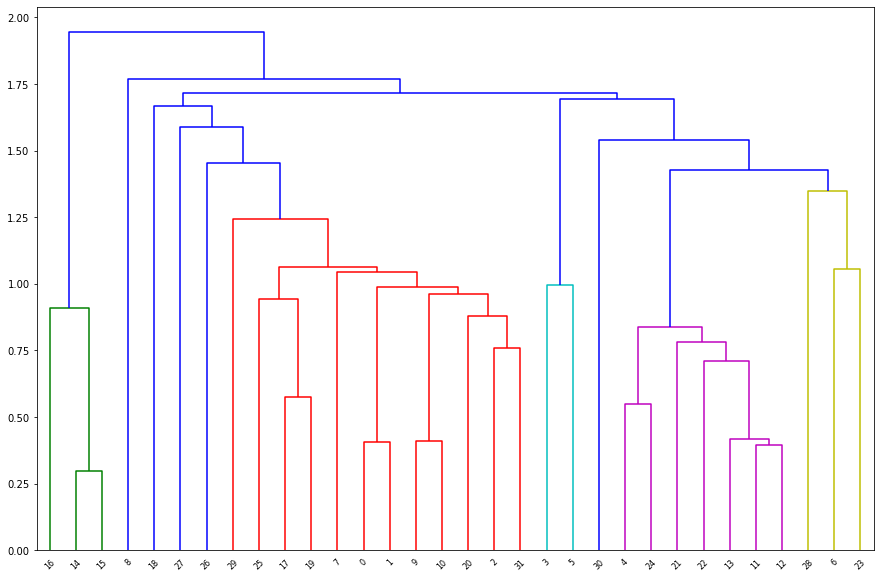

In [ ]:
# initialize a new figure
fig = plt.figure(figsize=(15, 10))

# create the dendrogram
dn = dendrogram(
    linkage(X, method='single'),
)

# show the figure
plt.show()

Typically, it is more convenient to flip the orientation of the dendrogram
- This can be achieved by specifying the **`orientation`** argument in the **`dendrogram`** function
- We will use **`orientation='right'`**

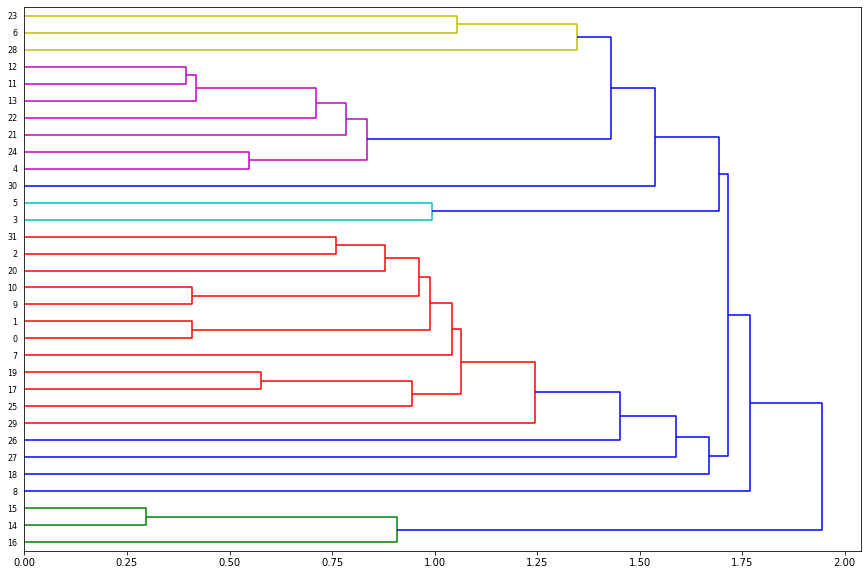

In [ ]:
# initialize a new figure
fig = plt.figure(figsize=(15, 10))

# create the dendrogram
dn = dendrogram(
    linkage(X, method='single'),
    orientation='right',
)

# show the figure
plt.show()

If you have labels for the observations in the data, the interpretability of a dendrogram can be improved significantly by including those labels
- In our dataset we have these labels, the name of each car

We can add this information specifying the **`labels`** argument in the **`dendrogram`** function. We will use the **`index`** from our data **`X`** as labels:

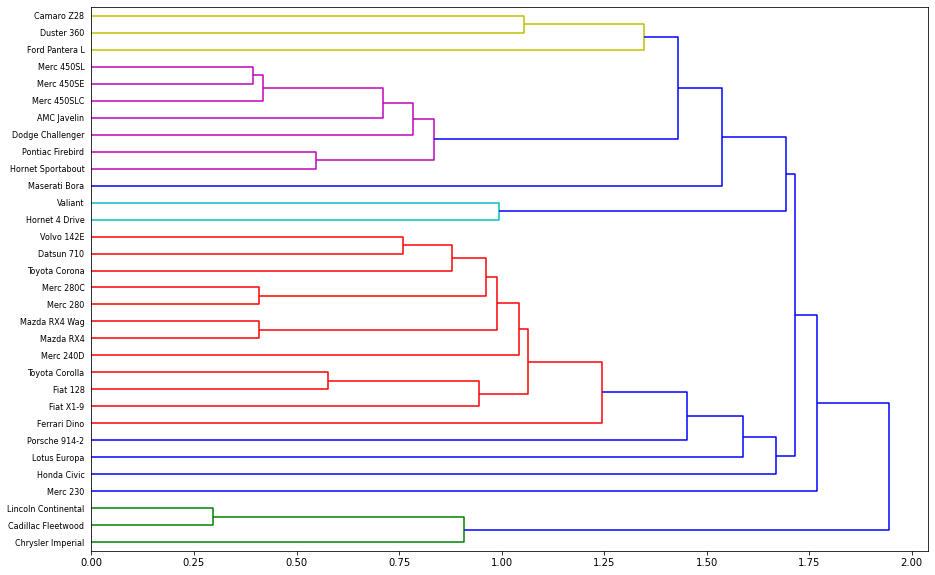

In [ ]:
# initialize a new figure
fig = plt.figure(figsize=(15, 10))

# create the dendrogram
dn = dendrogram(
    linkage(X, method='single'),
    orientation='right',
    labels=X.index,
)

# show the figure
plt.show()

Finally, before we start interpreting the dendrogram, you should know that on the horizontal axis (if **`orientation='right'`**), the **distance between clusters** is displayed.

Let us add this information to the plot, together with a title:

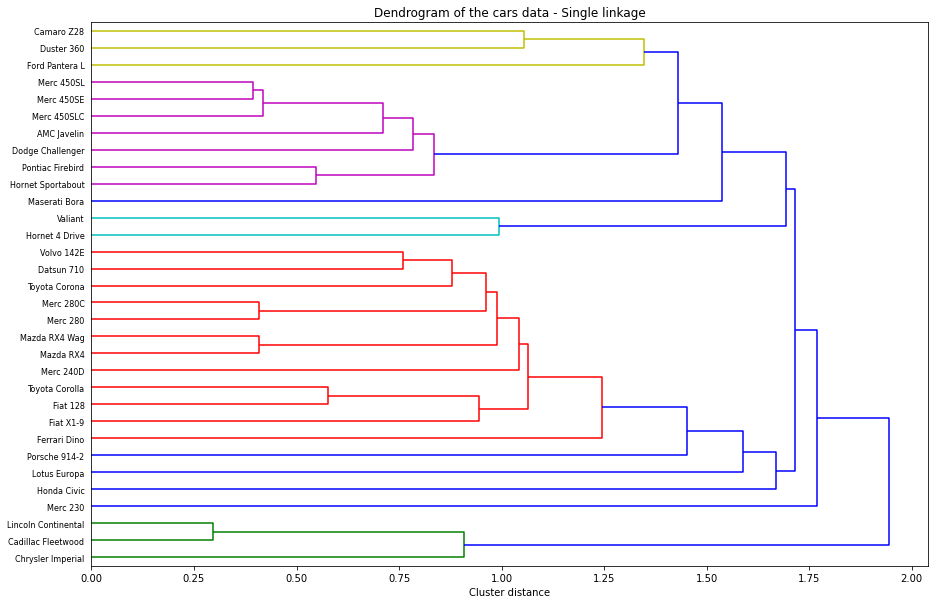

In [ ]:
# initialize a new figure
fig = plt.figure(figsize=(15, 10))

# create the dendrogram
dn = dendrogram(
    linkage(X, method='single'),
    orientation='right',
    labels=X.index,
)

# Add title and x-axis label
plt.title('Dendrogram of the cars data - Single linkage')
plt.xlabel('Cluster distance')

# show the figure
plt.show()

Now let us discuss the dendrogram step by step

First, about the colors:
- The **colors in the dendrogram have no substantive meaning**!!
- They are created by the **`dendrogram`** function to make the figure easier to interpret
- However, the colors are not part of the output of the hierarchical cluster.

Second, about the horizontal distances:
- Each observation is represented by a **horizontal** line
- A **cluster merge** is visualized by two horizontal lines being connected by a **vertical line**
- The position of this vertical line on the horizontal axis indicates the **cluster distance** between the two merged clusters
- Cluster merges that have a **larger cluster distance**, occur at a **later iteration** in the agglomerative clustering algorithm

Therefore:
- The horizontal location of a cluster merge says something about how different the two merged clusters are
- The larger the cluster distance, the more dissimilar the merged clusters

For example:
- At the bottom of the dendrogram we observe that the the Chrysler Imperial is merged to the first created cluster, which contains the Cadillac Fleetwood and the Lincoln Continental
- We can inspect those three observations in the data

In [ ]:
X.loc[['Lincoln Continental', 'Cadillac Fleetwood', 'Chrysler Imperial']]

,mpg,disp,hp,drat,wt,qsec
Carname,,,,,,
Lincoln Continental,-1.607883,1.849932,0.996348,-1.115740,2.255336,-0.016089
Cadillac Fleetwood,-1.607883,1.946754,0.850497,-1.246660,2.077505,0.073449
Chrysler Imperial,-0.894420,1.688562,1.215126,-0.685575,2.174596,-0.239935


Indeed we observe some similiarties, for example between `disp` and `wt`, but other variables are quite different, like `mpg` and `qsec`

Now that we know how to create a dendrogram and how to interpret it, it becomes easier to compare solutions of different **linkage methods**

For example, this is the dendrogram corresponding to the **Ward linkage** method:

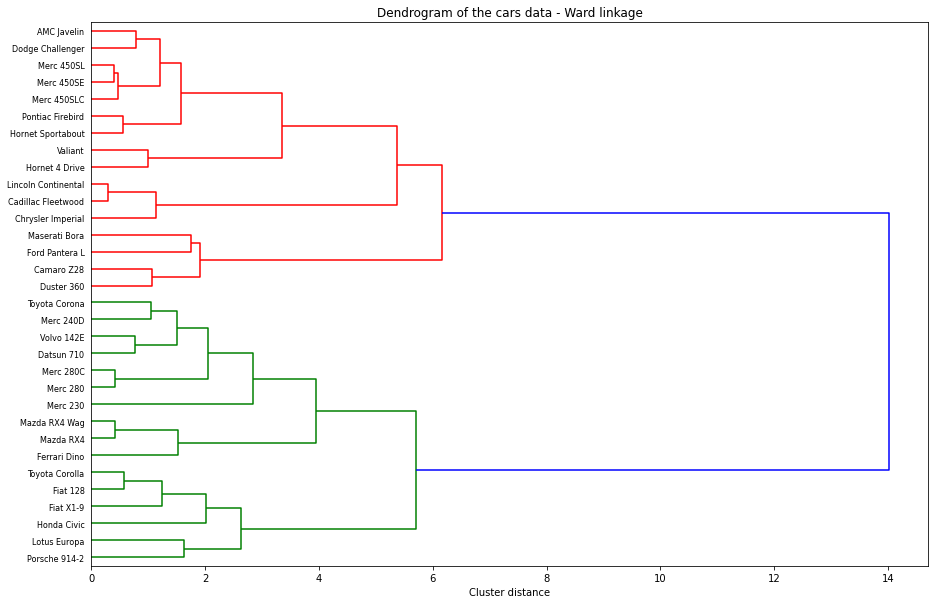

In [ ]:
# initialize a new figure
fig = plt.figure(figsize=(15, 10))

# create the dendrogram
dn = dendrogram(
    linkage(X, method='ward'), # change this from 'single' to 'ward'
    orientation='right',
    labels=X.index,
)

# Add title and x-axis label
plt.title('Dendrogram of the cars data - Ward linkage') # don't forget to change your title!
plt.xlabel('Cluster distance')

# show the figure
plt.show()


For the last cluster merge we observe a big "jump" in cluster distance
- Think of this jump as the distance that needs to be overcome before the clusters can be merged
- The larger the distance that needs to be overcome to merge clusters, the more dissimilar the clusters are
- In other words, these clusters are not similar at all!

To provide further interpretation to the Ward solution:
- Its dendrogram seems to hint at a solution of 2 clusters, as the jump in cluster distance to go from 2 clusters to just 1 is large.
- There is also a relatively large "jump" in cluster distance if we move from 5 clusters (achieved at a cluster distance of approximately 4) to a solution with 4 clusters (achieved at a cluster distance of approximately 5.5)
- **You could use this information to help you better determine the number of clusters in $K$-means!**